# German Cred Score Notebook 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("GermanData.csv")
df
df.head(10)


Status of existing checking account  Duration in month Credit history  \
0                                 A11                  6            A34   
1                                 A12                 48            A32   
2                                 A14                 12            A34   
3                                 A11                 42            A32   
4                                 A11                 24            A33   
5                                 A14                 36            A32   
6                                 A14                 24            A32   
7                                 A12                 36            A32   
8                                 A14                 12            A32   
9                                 A12                 30            A34   

  Purpose  Credit amount Savings account/bonds Present employment since  \
0     A43           1169                   A65                      A75   
1     A43           5951                   A61                      A73   
2     A46           2096                   A61                      A74   
3     A42           7882                   A61                      A74   
4     A40           4870                   A61                      A73   
5     A46           9055                   A65                      A73   
6     A42           2835                   A63                      A75   
7     A41           6948                   A61                      A73   
8     A43           3059                   A64                      A74   
9     A40           5234                   A61                      A71   

   Installment rate in percentage of disposable income  \
0                                                  4     
1                                                  2     
2                                                  2     
3                                                  2     
4                                                  3     
5                                                  2     
6                                                  3     
7                                                  2     
8                                                  2     
9                                                  4     

  Personal status and sex Other debtors / guarantors  ...  Property  \
0                     A93                       A101  ...      A121   
1                     A92                       A101  ...      A121   
2                     A93                       A101  ...      A121   
3                     A93                       A103  ...      A122   
4                     A93                       A101  ...      A124   
5                     A93                       A101  ...      A124   
6                     A93                       A101  ...      A122   
7                     A93                       A101  ...      A123   
8                     A91                       A101  ...      A121   
9                     A94                       A101  ...      A123   

  Age in years  Other installment plans Housing  \
0           67                     A143    A152   
1           22                     A143    A152   
2           49                     A143    A152   
3           45                     A143    A153   
4           53                     A143    A153   
5           35                     A143    A153   
6           53                     A143    A152   
7           35                     A143    A151   
8           61                     A143    A152   
9           28                     A143    A152   

  Number of existing credits at this bank   Job  \
0                                       2  A173   
1                                       1  A173   
2                                       1  A172   
3                                       1  A173   
4                                       2  A173   
5                                       1  A172   
6         

# Data Preprocessing
**1) Mapping categorical values**

In [3]:
pro_data=df
for i,j in enumerate(pro_data['Status of existing checking account']):
    # print(i)
    if j == 'A11':
        pro_data.loc[i,'Status of existing checking account'] = '<0 DM'
    elif j == 'A12':
        pro_data.loc[i,'Status of existing checking account'] = '0<=..<200 DM'
    elif j == 'A13':
        pro_data.loc[i,'Status of existing checking account'] = '..>=200 DM /salary assignments for at least 1 year'
    elif j == 'A14':
        pro_data.loc[i,'Status of existing checking account'] = 'no checking account'
for i,j in enumerate(pro_data['Credit history']):
    # print(i) : 
    if j == 'A30':
        pro_data.loc[i,'Credit history'] = "no credits taken/all credits paid back duly"
    elif j == 'A31':
        pro_data.loc[i,'Credit history'] = "all credits at this bank paid back duly"
    elif j == 'A32':
        pro_data.loc[i,'Credit history'] = "existing credits paid back duly till now"
    elif j == 'A33':
        pro_data.loc[i,'Credit history'] = "delay in paying off in the past"
    elif j == 'A34':
        pro_data.loc[i,'Credit history'] = "critical account/other credits existing (not at this bank)"
for i,j in enumerate(pro_data['Purpose']):
    # print(i) : 
    if j == 'A40':
        pro_data.loc[i,'Purpose'] = "car (new)"
    elif j == 'A41':
        pro_data.loc[i,'Purpose'] = "car (used)"    
    elif j == 'A42':
        pro_data.loc[i,'Purpose'] = "furniture/equipment"
    elif j == 'A43':
        pro_data.loc[i,'Purpose'] = "radio/television"
    elif j == 'A44':
        pro_data.loc[i,'Purpose'] = "domestic appliances"
    elif j == 'A45':
        pro_data.loc[i,'Purpose'] = "repairs"
    elif j == 'A46':
        pro_data.loc[i,'Purpose'] = "education"
    elif j == 'A47':
        pro_data.loc[i,'Purpose'] = "(vacation - does not exist?)"
    elif j == 'A48':
        pro_data.loc[i,'Purpose'] = "retraining"
    elif j == 'A49':
        pro_data.loc[i,'Purpose'] = "business"
    elif j == 'A410':
        pro_data.loc[i,'Purpose'] = "others"
pro_data

Status of existing checking account  Duration in month  \
0                                 <0 DM                  6   
1                          0<=..<200 DM                 48   
2                   no checking account                 12   
3                                 <0 DM                 42   
4                                 <0 DM                 24   
..                                  ...                ...   
995                 no checking account                 12   
996                               <0 DM                 30   
997                 no checking account                 12   
998                               <0 DM                 45   
999                        0<=..<200 DM                 45   

                                        Credit history              Purpose  \
0    critical account/other credits existing (not a...     radio/television   
1             existing credits paid back duly till now     radio/television   
2    critical account/other credits existing (not a...            education   
3             existing credits paid back duly till now  furniture/equipment   
4                      delay in paying off in the past            car (new)   
..                                                 ...                  ...   
995           existing credits paid back duly till now  furniture/equipment   
996           existing credits paid back duly till now           car (used)   
997           existing credits paid back duly till now     radio/television   
998           existing credits paid back duly till now     radio/television   
999  critical account/other credits existing (not a...           car (used)   

     Credit amount Savings account/bonds Present employment since  \
0             1169                   A65                      A75   
1             5951                   A61                      A73   
2             2096                   A61                      A74   
3             7882                   A61                      A74   
4             4870                   A61                      A73   
..             ...                   ...                      ...   
995           1736                   A61                      A74   
996           3857                   A61                      A73   
997            804                   A61                      A75   
998           1845                   A61                      A73   
999           4576                   A62                      A71   

     Installment rate in percentage of disposable income  \
0                                                    4     
1                                                    2     
2                                                    2     
3                                                    2     
4                                                    3     
..                                                 ...     
995                                                  3     
996                                                  4     
997                                                  4     
998                                                  4     
999                                                  3     

    Personal status and sex Other debtors / guarantors  ...  Property  \
0                       A93                       A101  ...      A121   
1                       A92                       A101  ...      A121   
2                       A93                       A101  ...      A121   
3                       A93                       A103  ...      A122   
4                       A93                       A101  ...      A124   
..                      ...                        ...  ...       ...   
995                     A92                       A101  ...      A121   
996                     A91                       A101  ...      A122   
997                     A93                       A101  ...      A123   
998                     A93   

In [4]:
pro_data=df
for i,j in enumerate(pro_data['Savings account/bonds']):
    # print(i) : 
    if j == 'A61':
        pro_data.loc[i,'Savings account/bonds'] = "little"
    elif j == 'A62':
        pro_data.loc[i,'Savings account/bonds'] = "moderate"
    elif j == 'A63':
        pro_data.loc[i,'Savings account/bonds'] = "quite rich"
    elif j == 'A64':
        pro_data.loc[i,'Savings account/bonds'] = "rich"
    elif j == 'A65':
        pro_data.loc[i,'Savings account/bonds'] = "unknown/ no savings account"
for i,j in enumerate(pro_data['Present employment since']):
    # print(i) : 
    if j == 'A71':
        pro_data.loc[i,'Present employment since'] = "unemployed"
    elif j == 'A72':
        pro_data.loc[i,'Present employment since'] = "less than 1 year"
    elif j == 'A73':
        pro_data.loc[i,'Present employment since'] = "less than 4 years"
    elif j == 'A74':
        pro_data.loc[i,'Present employment since'] = "less than 7 years"
    elif j == 'A75':
        pro_data.loc[i,'Present employment since'] = "greater than 7 years"
pro_data

Status of existing checking account  Duration in month  \
0                                 <0 DM                  6   
1                          0<=..<200 DM                 48   
2                   no checking account                 12   
3                                 <0 DM                 42   
4                                 <0 DM                 24   
..                                  ...                ...   
995                 no checking account                 12   
996                               <0 DM                 30   
997                 no checking account                 12   
998                               <0 DM                 45   
999                        0<=..<200 DM                 45   

                                        Credit history              Purpose  \
0    critical account/other credits existing (not a...     radio/television   
1             existing credits paid back duly till now     radio/television   
2    critical account/other credits existing (not a...            education   
3             existing credits paid back duly till now  furniture/equipment   
4                      delay in paying off in the past            car (new)   
..                                                 ...                  ...   
995           existing credits paid back duly till now  furniture/equipment   
996           existing credits paid back duly till now           car (used)   
997           existing credits paid back duly till now     radio/television   
998           existing credits paid back duly till now     radio/television   
999  critical account/other credits existing (not a...           car (used)   

     Credit amount        Savings account/bonds Present employment since  \
0             1169  unknown/ no savings account     greater than 7 years   
1             5951                       little        less than 4 years   
2             2096                       little        less than 7 years   
3             7882                       little        less than 7 years   
4             4870                       little        less than 4 years   
..             ...                          ...                      ...   
995           1736                       little        less than 7 years   
996           3857                       little        less than 4 years   
997            804                       little     greater than 7 years   
998           1845                       little        less than 4 years   
999           4576                     moderate               unemployed   

     Installment rate in percentage of disposable income  \
0                                                    4     
1                                                    2     
2                                                    2     
3                                                    2     
4                                                    3     
..                                                 ...     
995                                                  3     
996                                                  4     
997                                                  4     
998                                                  4     
999                                                  3     

    Personal status and sex Other debtors / guarantors  ...  Property  \
0                       A93                       A101  ...      A121   
1                       A92                       A101  ...      A121   
2                       A93                       A101  ...      A121   
3                       A93                       A103  ...      A122   
4                       A93                       A101  ...      A124   
..                      ...                        ...  ...       ...   
995                     A92                       A101  ...      A121   
996                     A91                       A101  ...      A122   
997                

In [5]:
for i,j in enumerate(pro_data['Personal status and sex']):
    # print(i) : 
    if j == 'A91':
        pro_data.loc[i,'Personal status and sex'] = "male"
    elif j == 'A92':
        pro_data.loc[i,'Personal status and sex'] = "female"
    elif j == 'A93':
        pro_data.loc[i,'Personal status and sex'] = "male"
    elif j == 'A94':
        pro_data.loc[i,'Personal status and sex'] = "male"
    elif j == 'A95':
        pro_data.loc[i,'Personal status and sex'] = "female"
pro_data
new={"Personal status and sex":"sex"}
pro_data=pro_data.rename(columns=new)

for i,j in enumerate(pro_data['Other debtors / guarantors']):
    # print(i) : 
    if j == 'A101':
        pro_data.loc[i,'Other debtors / guarantors'] = "None"
    elif j == 'A102':
        pro_data.loc[i,'Other debtors / guarantors'] = "co-applicant"
    elif j == 'A103':
        pro_data.loc[i,'Other debtors / guarantors'] = "guarantor"
        
pro_data


Status of existing checking account  Duration in month  \
0                                 <0 DM                  6   
1                          0<=..<200 DM                 48   
2                   no checking account                 12   
3                                 <0 DM                 42   
4                                 <0 DM                 24   
..                                  ...                ...   
995                 no checking account                 12   
996                               <0 DM                 30   
997                 no checking account                 12   
998                               <0 DM                 45   
999                        0<=..<200 DM                 45   

                                        Credit history              Purpose  \
0    critical account/other credits existing (not a...     radio/television   
1             existing credits paid back duly till now     radio/television   
2    critical account/other credits existing (not a...            education   
3             existing credits paid back duly till now  furniture/equipment   
4                      delay in paying off in the past            car (new)   
..                                                 ...                  ...   
995           existing credits paid back duly till now  furniture/equipment   
996           existing credits paid back duly till now           car (used)   
997           existing credits paid back duly till now     radio/television   
998           existing credits paid back duly till now     radio/television   
999  critical account/other credits existing (not a...           car (used)   

     Credit amount        Savings account/bonds Present employment since  \
0             1169  unknown/ no savings account     greater than 7 years   
1             5951                       little        less than 4 years   
2             2096                       little        less than 7 years   
3             7882                       little        less than 7 years   
4             4870                       little        less than 4 years   
..             ...                          ...                      ...   
995           1736                       little        less than 7 years   
996           3857                       little        less than 4 years   
997            804                       little     greater than 7 years   
998           1845                       little        less than 4 years   
999           4576                     moderate               unemployed   

     Installment rate in percentage of disposable income     sex  \
0                                                    4      male   
1                                                    2    female   
2                                                    2      male   
3                                                    2      male   
4                                                    3      male   
..                                                 ...       ...   
995                                                  3    female   
996                                                  4      male   
997                                                  4      male   
998                                                  4      male   
999                                                  3      male   

    Other debtors / guarantors  ...  Property Age in years  \
0                         None  ...      A121           67   
1                         None  ...      A121           22   
2                         None  ...      A121           49   
3                    guarantor  ...      A122           45   
4                         None  ...      A124           53   
..                         ...  ...       ...          ...   
995                       None  ...      A121           31   
996                       None  ...      A122           40   
997                   

In [6]:
for i,j in enumerate(pro_data['Property']):
    # print(i) : 
    if j == 'A121':
        pro_data.loc[i,'Property'] = "real estate"
    elif j == 'A122':
        pro_data.loc[i,'Property'] = "building society savings agreement/life insurance"
    elif j == 'A123':
        pro_data.loc[i,'Property'] = "car or other, not in attribute 6"
    elif j == 'A124':
        pro_data.loc[i,'Property'] = "unknown / no property"  

for i,j in enumerate(pro_data['Other installment plans']):
    # print(i) : 
    if j == 'A141':
        pro_data.loc[i,'Other installment plans'] = "Bank"
    elif j == 'A142':
        pro_data.loc[i,'Other installment plans'] = "Stores"
    elif j == 'A143':
        pro_data.loc[i,'Other installment plans'] = "None"
pro_data


Status of existing checking account  Duration in month  \
0                                 <0 DM                  6   
1                          0<=..<200 DM                 48   
2                   no checking account                 12   
3                                 <0 DM                 42   
4                                 <0 DM                 24   
..                                  ...                ...   
995                 no checking account                 12   
996                               <0 DM                 30   
997                 no checking account                 12   
998                               <0 DM                 45   
999                        0<=..<200 DM                 45   

                                        Credit history              Purpose  \
0    critical account/other credits existing (not a...     radio/television   
1             existing credits paid back duly till now     radio/television   
2    critical account/other credits existing (not a...            education   
3             existing credits paid back duly till now  furniture/equipment   
4                      delay in paying off in the past            car (new)   
..                                                 ...                  ...   
995           existing credits paid back duly till now  furniture/equipment   
996           existing credits paid back duly till now           car (used)   
997           existing credits paid back duly till now     radio/television   
998           existing credits paid back duly till now     radio/television   
999  critical account/other credits existing (not a...           car (used)   

     Credit amount        Savings account/bonds Present employment since  \
0             1169  unknown/ no savings account     greater than 7 years   
1             5951                       little        less than 4 years   
2             2096                       little        less than 7 years   
3             7882                       little        less than 7 years   
4             4870                       little        less than 4 years   
..             ...                          ...                      ...   
995           1736                       little        less than 7 years   
996           3857                       little        less than 4 years   
997            804                       little     greater than 7 years   
998           1845                       little        less than 4 years   
999           4576                     moderate               unemployed   

     Installment rate in percentage of disposable income     sex  \
0                                                    4      male   
1                                                    2    female   
2                                                    2      male   
3                                                    2      male   
4                                                    3      male   
..                                                 ...       ...   
995                                                  3    female   
996                                                  4      male   
997                                                  4      male   
998                                                  4      male   
999                                                  3      male   

    Other debtors / guarantors  ...  \
0                         None  ...   
1                         None  ...   
2                         None  ...   
3                    guarantor  ...   
4                         None  ...   
..                         ...  ...   
995                       None  ...   
996                       None  ...   
997                       None  ...   
998                       None  ...   
999                       None  ...   

                                              Property Age in years  \
0                                       

In [7]:
for i,j in enumerate(pro_data['Housing']):
    # print(i) : 
    if j == 'A151':
        pro_data.loc[i,'Housing'] = "Rent"
    elif j == 'A152':
        pro_data.loc[i,'Housing'] = "Own"
    elif j == 'A153':
        pro_data.loc[i,'Housing'] = "For Free"
for i,j in enumerate(pro_data['Job']):
    # print(i) : 
    if j == 'A171':
        pro_data.loc[i,'Job'] = "unemployed/ unskilled  - non-resident"
    elif j == 'A172':
        pro_data.loc[i,'Job'] = "unskilled - resident"
    elif j == 'A173':
        pro_data.loc[i,'Job'] = "skilled employee / official"
    elif j == 'A174':
        pro_data.loc[i,'Job'] = "management/ self-employed/highly qualified employee/ officer"
pro_data

Status of existing checking account  Duration in month  \
0                                 <0 DM                  6   
1                          0<=..<200 DM                 48   
2                   no checking account                 12   
3                                 <0 DM                 42   
4                                 <0 DM                 24   
..                                  ...                ...   
995                 no checking account                 12   
996                               <0 DM                 30   
997                 no checking account                 12   
998                               <0 DM                 45   
999                        0<=..<200 DM                 45   

                                        Credit history              Purpose  \
0    critical account/other credits existing (not a...     radio/television   
1             existing credits paid back duly till now     radio/television   
2    critical account/other credits existing (not a...            education   
3             existing credits paid back duly till now  furniture/equipment   
4                      delay in paying off in the past            car (new)   
..                                                 ...                  ...   
995           existing credits paid back duly till now  furniture/equipment   
996           existing credits paid back duly till now           car (used)   
997           existing credits paid back duly till now     radio/television   
998           existing credits paid back duly till now     radio/television   
999  critical account/other credits existing (not a...           car (used)   

     Credit amount        Savings account/bonds Present employment since  \
0             1169  unknown/ no savings account     greater than 7 years   
1             5951                       little        less than 4 years   
2             2096                       little        less than 7 years   
3             7882                       little        less than 7 years   
4             4870                       little        less than 4 years   
..             ...                          ...                      ...   
995           1736                       little        less than 7 years   
996           3857                       little        less than 4 years   
997            804                       little     greater than 7 years   
998           1845                       little        less than 4 years   
999           4576                     moderate               unemployed   

     Installment rate in percentage of disposable income     sex  \
0                                                    4      male   
1                                                    2    female   
2                                                    2      male   
3                                                    2      male   
4                                                    3      male   
..                                                 ...       ...   
995                                                  3    female   
996                                                  4      male   
997                                                  4      male   
998                                                  4      male   
999                                                  3      male   

    Other debtors / guarantors  ...  \
0                         None  ...   
1                         None  ...   
2                         None  ...   
3                    guarantor  ...   
4                         None  ...   
..                         ...  ...   
995                       None  ...   
996                       None  ...   
997                       None  ...   
998                       None  ...   
999                       None  ...   

                                              Property Age in years  \
0                                       

In [8]:
for i,j in enumerate(pro_data['Telephone']):
    # print(i) : 
    if j == 'A191':
        pro_data.loc[i,'Telephone'] = "None"
    elif j == 'A192':
        pro_data.loc[i,'Telephone'] = "yes, registered under the customers name"
for i,j in enumerate(pro_data['foreign worker']):
    # print(i) : 
    if j == 'A201':
        pro_data.loc[i,'foreign worker'] = "Yes"
    elif j == 'A202':
        pro_data.loc[i,'foreign worker'] = "No"
pro_data

Status of existing checking account  Duration in month  \
0                                 <0 DM                  6   
1                          0<=..<200 DM                 48   
2                   no checking account                 12   
3                                 <0 DM                 42   
4                                 <0 DM                 24   
..                                  ...                ...   
995                 no checking account                 12   
996                               <0 DM                 30   
997                 no checking account                 12   
998                               <0 DM                 45   
999                        0<=..<200 DM                 45   

                                        Credit history              Purpose  \
0    critical account/other credits existing (not a...     radio/television   
1             existing credits paid back duly till now     radio/television   
2    critical account/other credits existing (not a...            education   
3             existing credits paid back duly till now  furniture/equipment   
4                      delay in paying off in the past            car (new)   
..                                                 ...                  ...   
995           existing credits paid back duly till now  furniture/equipment   
996           existing credits paid back duly till now           car (used)   
997           existing credits paid back duly till now     radio/television   
998           existing credits paid back duly till now     radio/television   
999  critical account/other credits existing (not a...           car (used)   

     Credit amount        Savings account/bonds Present employment since  \
0             1169  unknown/ no savings account     greater than 7 years   
1             5951                       little        less than 4 years   
2             2096                       little        less than 7 years   
3             7882                       little        less than 7 years   
4             4870                       little        less than 4 years   
..             ...                          ...                      ...   
995           1736                       little        less than 7 years   
996           3857                       little        less than 4 years   
997            804                       little     greater than 7 years   
998           1845                       little        less than 4 years   
999           4576                     moderate               unemployed   

     Installment rate in percentage of disposable income     sex  \
0                                                    4      male   
1                                                    2    female   
2                                                    2      male   
3                                                    2      male   
4                                                    3      male   
..                                                 ...       ...   
995                                                  3    female   
996                                                  4      male   
997                                                  4      male   
998                                                  4      male   
999                                                  3      male   

    Other debtors / guarantors  ...  \
0                         None  ...   
1                         None  ...   
2                         None  ...   
3                    guarantor  ...   
4                         None  ...   
..                         ...  ...   
995                       None  ...   
996                       None  ...   
997                       None  ...   
998                       None  ...   
999                       None  ...   

                                              Property Age in years  \
0                                       

C:\Windows\Temp\ipykernel_1236\305173201.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pro_data.corr())


<AxesSubplot:>

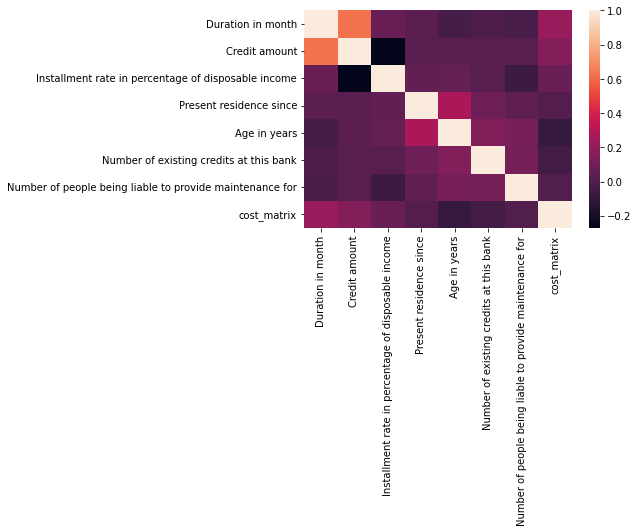

In [9]:
sns.heatmap(pro_data.corr())

In [10]:
pro_data1=pro_data.copy()
pro_data1

Status of existing checking account  Duration in month  \
0                                 <0 DM                  6   
1                          0<=..<200 DM                 48   
2                   no checking account                 12   
3                                 <0 DM                 42   
4                                 <0 DM                 24   
..                                  ...                ...   
995                 no checking account                 12   
996                               <0 DM                 30   
997                 no checking account                 12   
998                               <0 DM                 45   
999                        0<=..<200 DM                 45   

                                        Credit history              Purpose  \
0    critical account/other credits existing (not a...     radio/television   
1             existing credits paid back duly till now     radio/television   
2    critical account/other credits existing (not a...            education   
3             existing credits paid back duly till now  furniture/equipment   
4                      delay in paying off in the past            car (new)   
..                                                 ...                  ...   
995           existing credits paid back duly till now  furniture/equipment   
996           existing credits paid back duly till now           car (used)   
997           existing credits paid back duly till now     radio/television   
998           existing credits paid back duly till now     radio/television   
999  critical account/other credits existing (not a...           car (used)   

     Credit amount        Savings account/bonds Present employment since  \
0             1169  unknown/ no savings account     greater than 7 years   
1             5951                       little        less than 4 years   
2             2096                       little        less than 7 years   
3             7882                       little        less than 7 years   
4             4870                       little        less than 4 years   
..             ...                          ...                      ...   
995           1736                       little        less than 7 years   
996           3857                       little        less than 4 years   
997            804                       little     greater than 7 years   
998           1845                       little        less than 4 years   
999           4576                     moderate               unemployed   

     Installment rate in percentage of disposable income     sex  \
0                                                    4      male   
1                                                    2    female   
2                                                    2      male   
3                                                    2      male   
4                                                    3      male   
..                                                 ...       ...   
995                                                  3    female   
996                                                  4      male   
997                                                  4      male   
998                                                  4      male   
999                                                  3      male   

    Other debtors / guarantors  ...  \
0                         None  ...   
1                         None  ...   
2                         None  ...   
3                    guarantor  ...   
4                         None  ...   
..                         ...  ...   
995                       None  ...   
996                       None  ...   
997                       None  ...   
998                       None  ...   
999                       None  ...   

                                              Property Age in years  \
0                                       

# Conversion of categorical to numerical using Label Encoding
 
Label Encoding is used as there are many categorical variables and other methods such as one hot enconding and mean encoding is not used as one hot encoding leads creation of many features and mean encoding is desirable but not used as it leads to overfitting of the model


In [11]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
pro_data1['Credit history']=label_encoder.fit_transform(pro_data1['Credit history'])
  

pro_data1['Credit history'].unique

<bound method Series.unique of 0      1
1      3
2      1
3      3
4      2
      ..
995    3
996    3
997    3
998    3
999    1
Name: Credit history, Length: 1000, dtype: int32>

In [12]:
pro_data1['Status of existing checking account']=label_encoder.fit_transform(pro_data1['Status of existing checking account'])
pro_data1['Status of existing checking account'].unique

<bound method Series.unique of 0      2
1      1
2      3
3      2
4      2
      ..
995    3
996    2
997    3
998    2
999    1
Name: Status of existing checking account, Length: 1000, dtype: int32>

In [13]:
pro_data1['Purpose']=label_encoder.fit_transform(pro_data1['Purpose'])
pro_data1['Purpose'].unique
pro_data1['Savings account/bonds']=label_encoder.fit_transform(pro_data1['Savings account/bonds'])
pro_data1['Savings account/bonds'].unique
pro_data1['Present employment since']=label_encoder.fit_transform(pro_data1['Present employment since'])
pro_data1['Present employment since'].unique
pro_data1['sex']=label_encoder.fit_transform(pro_data1['sex'])
pro_data1['sex'].unique
pro_data1['Other debtors / guarantors']=label_encoder.fit_transform(pro_data1['Other debtors / guarantors'])
pro_data1['Other debtors / guarantors'].unique

<bound method Series.unique of 0      0
1      0
2      0
3      2
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Other debtors / guarantors, Length: 1000, dtype: int32>

In [14]:
pro_data1['Property']=label_encoder.fit_transform(pro_data1['Property'])
pro_data1['Property'].unique
pro_data1['Other installment plans']=label_encoder.fit_transform(pro_data1['Other installment plans'])
pro_data1['Other installment plans'].unique
pro_data1['Housing']=label_encoder.fit_transform(pro_data1['Housing'])
pro_data1['Housing'].unique
pro_data1['Job']=label_encoder.fit_transform(pro_data1['Job'])
pro_data1['Job'].unique
pro_data1['Telephone']=label_encoder.fit_transform(pro_data1['Telephone'])
pro_data1['Telephone'].unique
pro_data1['foreign worker']=label_encoder.fit_transform(pro_data1['foreign worker'])
pro_data1['foreign worker'].unique

<bound method Series.unique of 0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: foreign worker, Length: 1000, dtype: int32>

# Feature Selection using Correlation plot(pearsons correlation)

Here corrplot is used to determine features with highest correlation with the cost_matrix(cred_score).From this, we can say that 
cred savings accounts/bonds and cred history has highest correlation with the cost_matrix. Also, feature selection measured using Gini Index and Information Gain was done using Orange machine learning software to produce the top 10 features for the model.
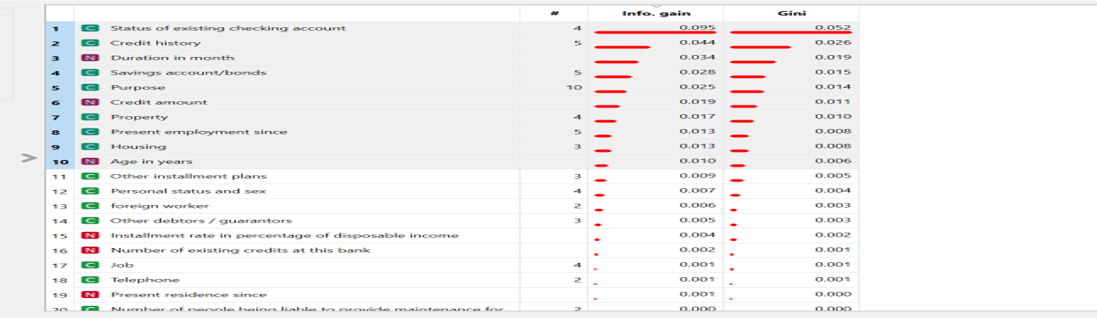


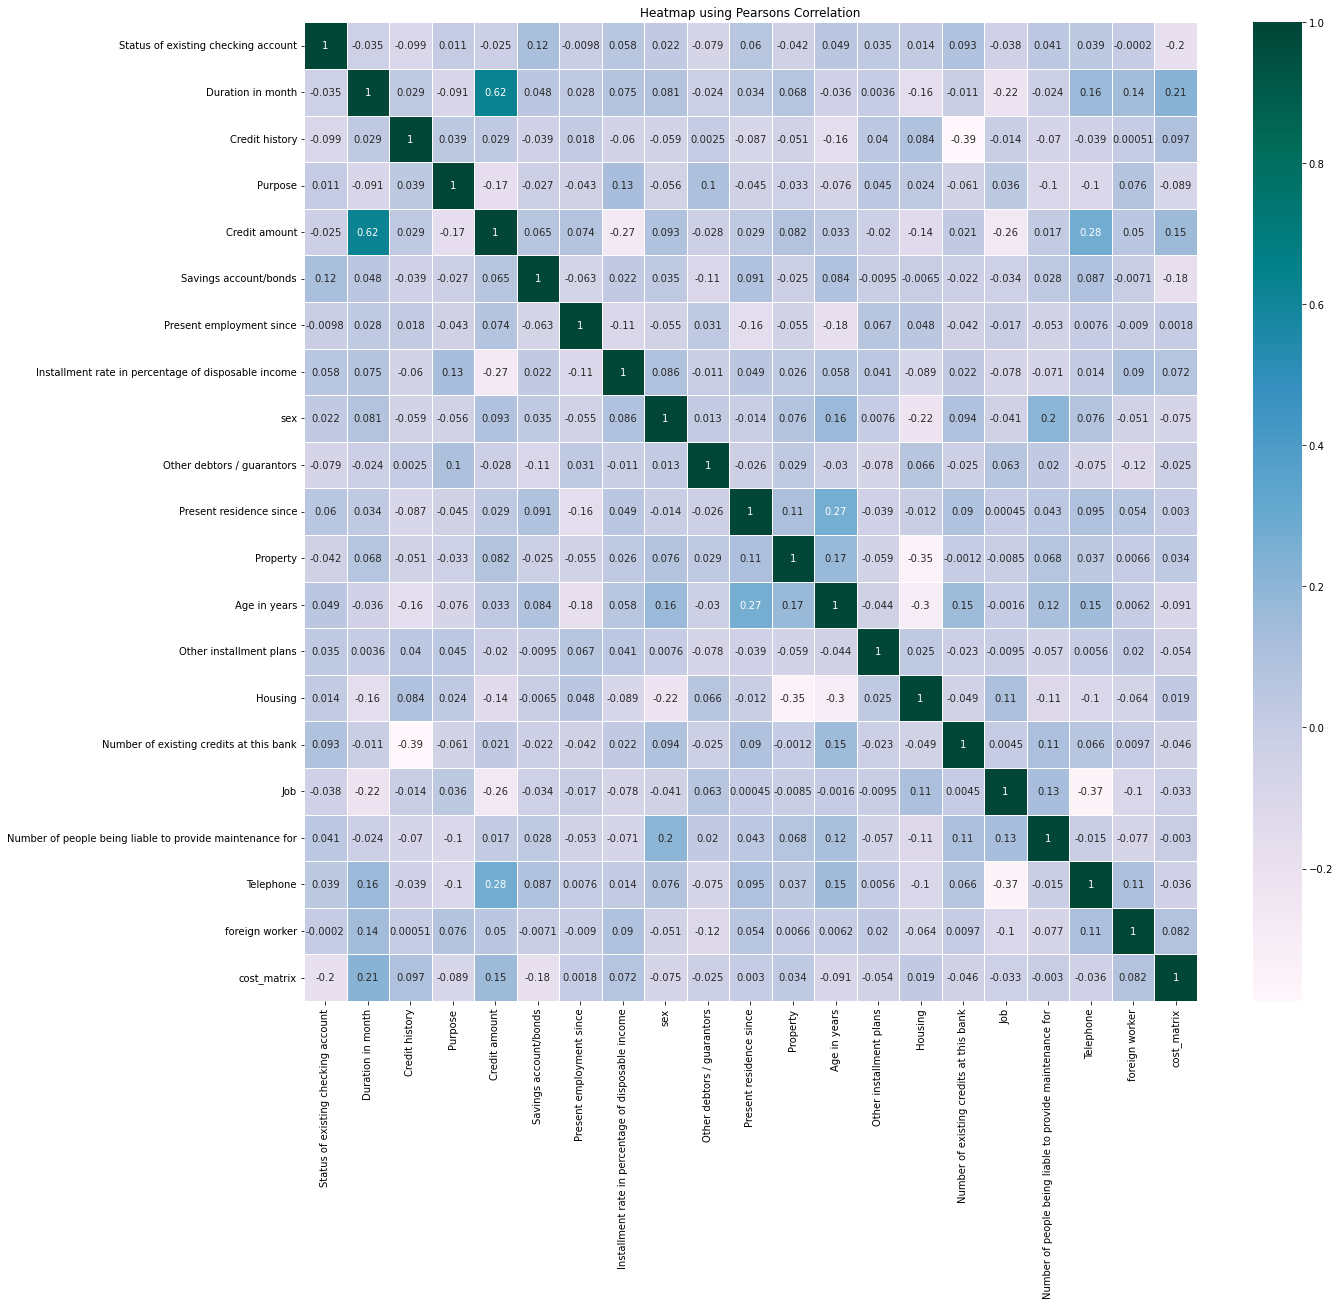

In [15]:
fig,ax = plt.subplots(figsize=(20,18))   
sns.heatmap(pro_data1.corr(),cmap="PuBuGn", annot=True, linewidths=.50, ax=ax).set(title='Heatmap using Pearsons Correlation')
plt.show()

In [16]:
pro_data1


Status of existing checking account  Duration in month  Credit history  \
0                                      2                  6               1   
1                                      1                 48               3   
2                                      3                 12               1   
3                                      2                 42               3   
4                                      2                 24               2   
..                                   ...                ...             ...   
995                                    3                 12               3   
996                                    2                 30               3   
997                                    3                 12               3   
998                                    2                 45               3   
999                                    1                 45               1   

     Purpose  Credit amount  Savings account/bonds  Present employment since  \
0          7           1169                      4                         0   
1          7           5951                      0                         2   
2          4           2096                      0                         3   
3          5           7882                      0                         3   
4          1           4870                      0                         2   
..       ...            ...                    ...                       ...   
995        5           1736                      0                         3   
996        2           3857                      0                         2   
997        7            804                      0                         0   
998        7           1845                      0                         2   
999        2           4576                      1                         4   

     Installment rate in percentage of disposable income  sex  \
0                                                    4      1   
1                                                    2      0   
2                                                    2      1   
3                                                    2      1   
4                                                    3      1   
..                                                 ...    ...   
995                                                  3      0   
996                                                  4      1   
997                                                  4      1   
998                                                  4      1   
999                                                  3      1   

     Other debtors / guarantors  ...  Property  Age in years  \
0                             0  ...         2            67   
1                             0  ...         2            22   
2                             0  ...         2            49   
3                             2  ...         0            45   
4                             0  ...         3            53   
..                          ...  ...       ...           ...   
995                           0  ...         2            31   
996                           0  ...         0            40   
997                           0  ...         1            38   
998                           0  ...         3            23   
999                           0  ...         1            27   

     Other installment plans  Housing  \
0                          1        1   
1                          1        1   
2                          1        1   
3                          1        0   
4                          1        0   
..                       ...      ...   
995                        1        1   
996                        1        1   
997                        1        1   
998                        1        0   
999                        1        1   

     Number of existing credits at this bank  Job  \

In [17]:
print(pro_data)

    Status of existing checking account  Duration in month  \
0                                 <0 DM                  6   
1                          0<=..<200 DM                 48   
2                   no checking account                 12   
3                                 <0 DM                 42   
4                                 <0 DM                 24   
..                                  ...                ...   
995                 no checking account                 12   
996                               <0 DM                 30   
997                 no checking account                 12   
998                               <0 DM                 45   
999                        0<=..<200 DM                 45   

                                        Credit history              Purpose  \
0    critical account/other credits existing (not a...     radio/television   
1             existing credits paid back duly till now     radio/television   
2    critical acco

In [18]:
pro=pro_data1.drop(columns=['Other installment plans','sex','foreign worker','Other debtors / guarantors','Installment rate in percentage of disposable income','Number of existing credits at this bank','Job','Telephone','Present residence since','Number of people being liable to provide maintenance for'])

In [19]:
pro

Status of existing checking account  Duration in month  Credit history  \
0                                      2                  6               1   
1                                      1                 48               3   
2                                      3                 12               1   
3                                      2                 42               3   
4                                      2                 24               2   
..                                   ...                ...             ...   
995                                    3                 12               3   
996                                    2                 30               3   
997                                    3                 12               3   
998                                    2                 45               3   
999                                    1                 45               1   

     Purpose  Credit amount  Savings account/bonds  Present employment since  \
0          7           1169                      4                         0   
1          7           5951                      0                         2   
2          4           2096                      0                         3   
3          5           7882                      0                         3   
4          1           4870                      0                         2   
..       ...            ...                    ...                       ...   
995        5           1736                      0                         3   
996        2           3857                      0                         2   
997        7            804                      0                         0   
998        7           1845                      0                         2   
999        2           4576                      1                         4   

     Property  Age in years  Housing  cost_matrix  
0           2            67        1            1  
1           2            22        1            2  
2           2            49        1            1  
3           0            45        0            1  
4           3            53        0            2  
..        ...           ...      ...          ...  
995         2            31        1            1  
996         0            40        1            1  
997         1            38        1            1  
998         3            23        0            2  
999         1            27        1            1  

[1000 rows x 11 columns]

In [20]:
pro.rename(columns = {'cost_matrix':'cred_score'}, inplace = True)

In [21]:
import plotly.express as plty

# Visualisation

From the below visualisation, we can come to the conclusion that the less duration in months to pay the credit amount leads to good credit score and more the duration leads to a bad credit score.(1-good, 2-bad)

In [40]:
fig = plty.box(pro, x="cred_score", y="Duration in month", color="cred_score",title="Duration in month with the cred score")
fig.show()


Here in this visualization, the people with car and others have a good credit score and count of people with real estate as the property have least bad cred score rating.

In [42]:
fig=plty.histogram(pro_data, x='Property', color="cost_matrix", barmode='group',title="Property distribution with cred score")
fig.show()

Here, in this visualisation, count of people with no checking account have more good credit rating and least bad credit rating.(1-good, 2-bad)

In [43]:
fig=plty.histogram(pro_data, x='Status of existing checking account', color="cost_matrix", barmode='group',title='Checking Account Distribution with Cred Score')
fig.show()

Here in this histogram, we can observe that people with own housing have more count of good credit score.

In [44]:
fig=plty.histogram(pro_data, x='Housing', color="cost_matrix", barmode='group',title="Housing distribution with cred score")
fig.show()

In [45]:
pro['cred_score'].value_counts()

1    700
2    300
Name: cred_score, dtype: int64

Here we can observe that the data is unbalanced.

<AxesSubplot:xlabel='cred_score', ylabel='count'>

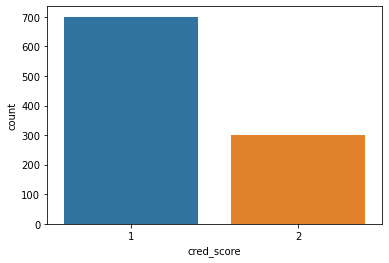

In [46]:
sns.countplot(pro['cred_score'])

cred_score
1   70.00
2   30.00
Name: cred_score, dtype: float64


<AxesSubplot:ylabel='cred_score'>

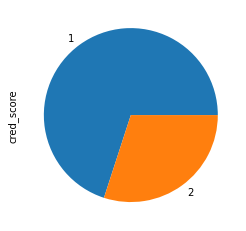

In [47]:
print((pro.groupby('cred_score')['cred_score'].count()/pro['cred_score'].count()) *100)
((pro.groupby('cred_score')['cred_score'].count()/pro['cred_score'].count()) *100).plot.pie()

In [48]:
x=pro.drop(['cred_score'],axis=1)
y=pro['cred_score']

In [49]:
x

Status of existing checking account  Duration in month  Credit history  \
0                                      2                  6               1   
1                                      1                 48               3   
2                                      3                 12               1   
3                                      2                 42               3   
4                                      2                 24               2   
..                                   ...                ...             ...   
995                                    3                 12               3   
996                                    2                 30               3   
997                                    3                 12               3   
998                                    2                 45               3   
999                                    1                 45               1   

     Purpose  Credit amount  Savings account/bonds  Present employment since  \
0          7           1169                      4                         0   
1          7           5951                      0                         2   
2          4           2096                      0                         3   
3          5           7882                      0                         3   
4          1           4870                      0                         2   
..       ...            ...                    ...                       ...   
995        5           1736                      0                         3   
996        2           3857                      0                         2   
997        7            804                      0                         0   
998        7           1845                      0                         2   
999        2           4576                      1                         4   

     Property  Age in years  Housing  
0           2            67        1  
1           2            22        1  
2           2            49        1  
3           0            45        0  
4           3            53        0  
..        ...           ...      ...  
995         2            31        1  
996         0            40        1  
997         1            38        1  
998         3            23        0  
999         1            27        1  

[1000 rows x 10 columns]

In [50]:
y

0      1
1      2
2      1
3      1
4      2
      ..
995    1
996    1
997    1
998    2
999    1
Name: cred_score, Length: 1000, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# Balancing of data using SMOTE in train data

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
sm=SMOTE(random_state=42)
x_res,y_res=sm.fit_resample(x_train,y_train)

In [55]:
import numpy as np
np.bincount(y_res)

array([  0, 522, 522], dtype=int64)

# Using Lazy Predict to find the best model 

In [56]:
from lazypredict.Supervised import LazyClassifier
clf=LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,random_state=42)
models,predictions=clf.fit(x_res,x_test,y_res,y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.59it/s]


                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.72               0.71     0.71      0.73   
NuSVC                              0.72               0.70     0.70      0.73   
ExtraTreesClassifier               0.75               0.70     0.70      0.75   
LGBMClassifier                     0.75               0.69     0.69      0.75   
BaggingClassifier                  0.75               0.69     0.69      0.75   
RandomForestClassifier             0.74               0.69     0.69      0.74   
KNeighborsClassifier               0.68               0.67     0.67      0.69   
DecisionTreeClassifier             0.70               0.67     0.67      0.71   
GaussianNB                         0.68               0.66     0.66      0.69   
LabelPropagation                   0.69               0.65     0.65      0.70   
LabelSpreading              

# Selection of model

Here we selected ExtraTreesClassifier as the best model as  it has a good accuracy score as compared to other models. Also as the data was highly imbalanced, we the selection of ExtraTreesClassifier was based on F1 score and it has a good F1 score of 75%.

In [57]:
from sklearn.ensemble import ExtraTreesClassifier

In [58]:
model5=ExtraTreesClassifier()
model5.fit(x_res,y_res)
pred5=model5.predict(x_test)
pred5

array([1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("confusion_matrix:\n",confusion_matrix(y_test,pred5))
print("accuracy_score:\n",accuracy_score(y_test,pred5)) 
print("classification_report:\n",classification_report(y_test,pred5))

confusion_matrix:
 [[144  34]
 [ 27  45]]
accuracy_score:
 0.756
classification_report:
               precision    recall  f1-score   support

           1       0.84      0.81      0.83       178
           2       0.57      0.62      0.60        72

    accuracy                           0.76       250
   macro avg       0.71      0.72      0.71       250
weighted avg       0.76      0.76      0.76       250



# Saving the trained model to a pickle file

In [36]:
import pickle

In [37]:
pickle.dump(model5,open('modelnew.pkl','wb'))

# Model Explainability using LIME

In [60]:
import lime
import lime.lime_tabular
predict_extra=lambda x_test: model5.predict_proba(x_test).astype(float)
z=x_res.values
explainer=lime.lime_tabular.LimeTabularExplainer(z,feature_names=x_res.columns,class_names=['BAD','GOOD'],kernel_width=5)

In [61]:
x_test.head()

Status of existing checking account  Duration in month  Credit history  \
521                                    2                 18               3   
737                                    2                 18               3   
740                                    2                 24               0   
660                                    0                 12               3   
411                                    3                 33               1   

     Purpose  Credit amount  Savings account/bonds  Present employment since  \
521        7           3190                      0                         2   
737        1           4380                      1                         2   
740        1           2325                      1                         3   
660        7           1297                      0                         2   
411        2           7253                      0                         3   

     Property  Age in years  Housing  
521         2            24        1  
737         1            35        1  
740         1            32        1  
660         2            23        2  
411         1            35        1

Model explainability for instance of a good credit score

In [62]:
choosen_instance=x_test.loc[[583]].values[0]
exp=explainer.explain_instance(choosen_instance,predict_extra,num_features=10)
exp.show_in_notebook(show_all=False)

Model explainability for instance of a bad credit score

In [63]:
choosen_instance=x_test.loc[[660]].values[0]
exp=explainer.explain_instance(choosen_instance,predict_extra,num_features=10)
exp.show_in_notebook(show_all=False)